# Test new features with binary classification
## Kaggle Titanic
This demo is based on **Titanic: Machine Learning from Disaster**  
https://www.kaggle.com/c/titanic/details/tutorials

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import os

%matplotlib inline

In [2]:
# read dataset
titanic = pd.read_csv('titanic_train.csv')

# impute null values
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].dropna().median())
titanic["Embarked"] = titanic["Embarked"].fillna("S")

# handle categrical features
titanic['Sex'] = titanic['Sex'].apply(lambda x : 1 if x == 'male' else 0)
titanic = pd.get_dummies(titanic, columns=['Embarked'])

# features to used
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

# build a simple xgboost classifier
clf = xgb.XGBClassifier(objective='binary:logistic', max_depth=4, learning_rate=0.05, subsample=0.85, 
                        colsample_bylevel=0.85, colsample_bytree=0.85, gamma=0.1, n_estimators=100)
clf.fit(titanic[features], titanic['Survived'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.85,
       colsample_bytree=0.85, gamma=0.1, learning_rate=0.05,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.85)

# testing PDPbox new features

In [3]:
import sys
sys.path.insert(0, '../../pdpbox/')

import pdp as pdp_test
from pdpbox import pdp

## test joblib and pickle

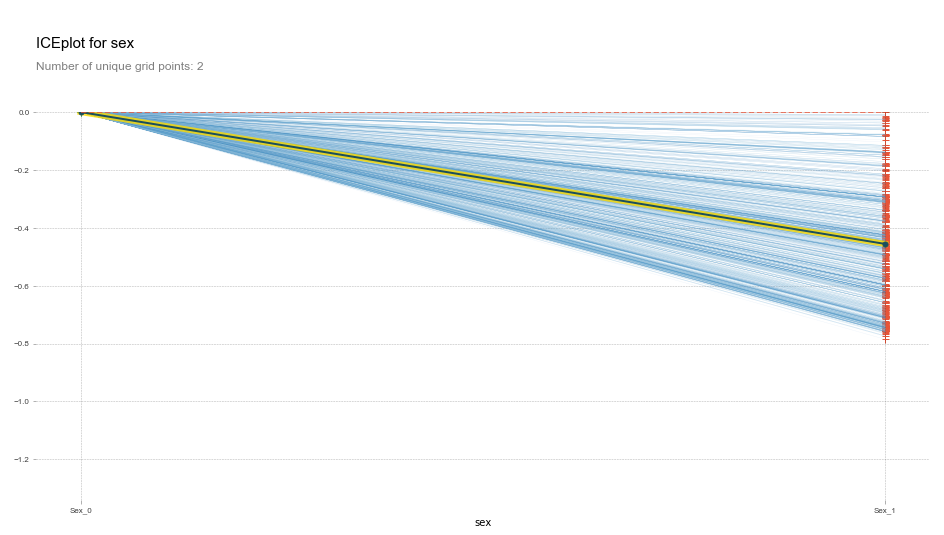

In [4]:
pdp_sex = pdp_test.pdp_isolate(clf, titanic[features], 'Sex')
pdp_test.pdp_plot(pdp_sex, 'sex', plot_org_pts=True, plot_lines=True, frac_to_plot=1)

In [5]:
from sklearn.externals import joblib

joblib.dump(pdp_sex, 'pdp_sex.pkl', compress=True)
pdp_sex = joblib.load('pdp_sex.pkl')

In [6]:
import pickle

pickle.dump(pdp_sex, open("pdp_sex.pickle", "wb"))
pdp_sex = pickle.load(open("pdp_sex.pickle", "r"))

## test parallel processing

In [7]:
%time pdp_fare = pdp_test.pdp_isolate(clf, titanic[features], 'Fare', num_grid_points=20)

CPU times: user 151 ms, sys: 2.99 ms, total: 154 ms
Wall time: 153 ms


In [8]:
%time pdp_fare = pdp_test.pdp_isolate(clf, titanic[features], 'Fare', num_grid_points=20, n_jobs=4)

CPU times: user 235 ms, sys: 60.8 ms, total: 296 ms
Wall time: 391 ms


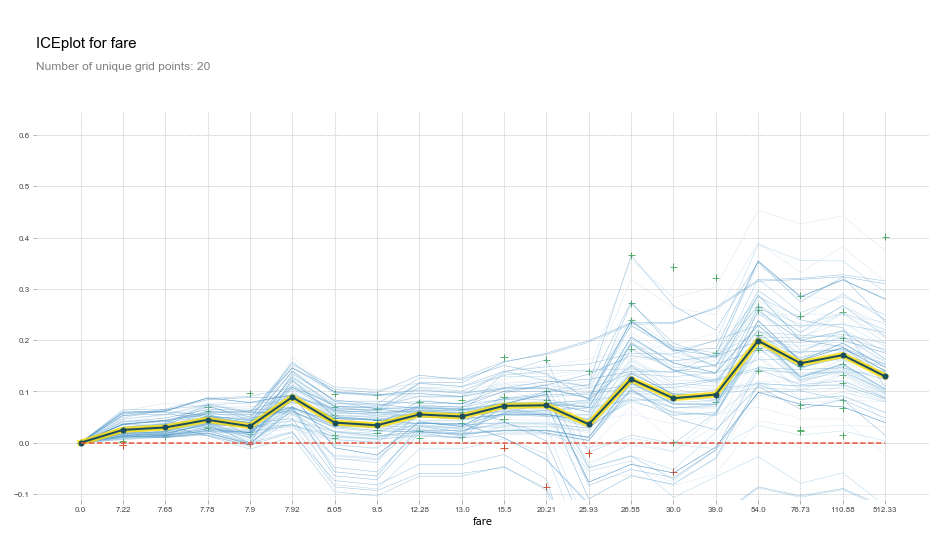

In [9]:
pdp_test.pdp_plot(pdp_fare, 'fare', plot_org_pts=True, plot_lines=True, frac_to_plot=0.1, x_quantile=True)

#### compare with the original one

In [10]:
%time pdp_fare_old = pdp.pdp_isolate(clf, titanic[features], 'Fare', num_grid_points=20)

CPU times: user 156 ms, sys: 2.54 ms, total: 159 ms
Wall time: 157 ms


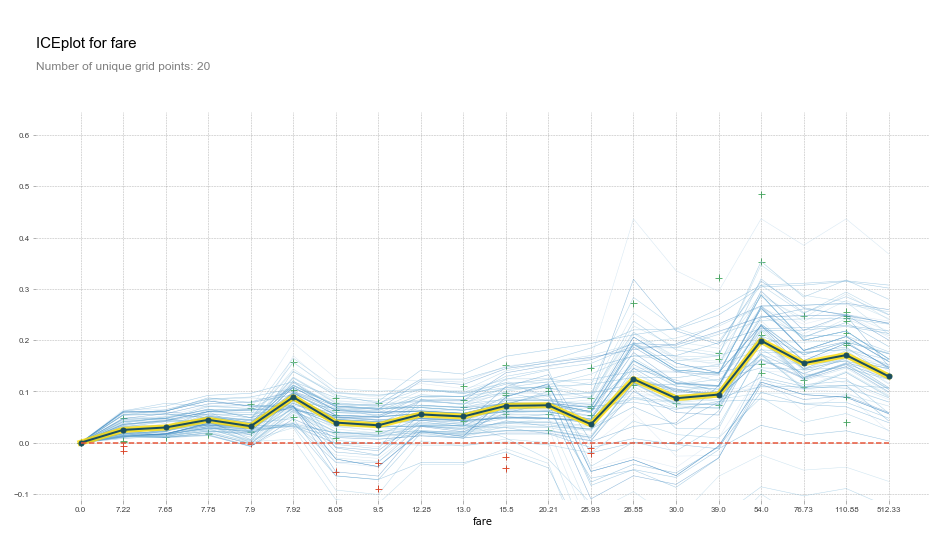

In [11]:
pdp.pdp_plot(pdp_fare_old, 'fare', plot_org_pts=True, plot_lines=True, frac_to_plot=0.1, x_quantile=True)

## test parallel processing: interation plot

In [12]:
%time inter1 = pdp_test.pdp_interact(clf, titanic[features], ['Age', 'Fare'])

CPU times: user 1.01 s, sys: 16.4 ms, total: 1.03 s
Wall time: 1.03 s


In [13]:
%time inter1 = pdp_test.pdp_interact(clf, titanic[features], ['Age', 'Fare'], n_jobs=4)

CPU times: user 564 ms, sys: 159 ms, total: 723 ms
Wall time: 930 ms


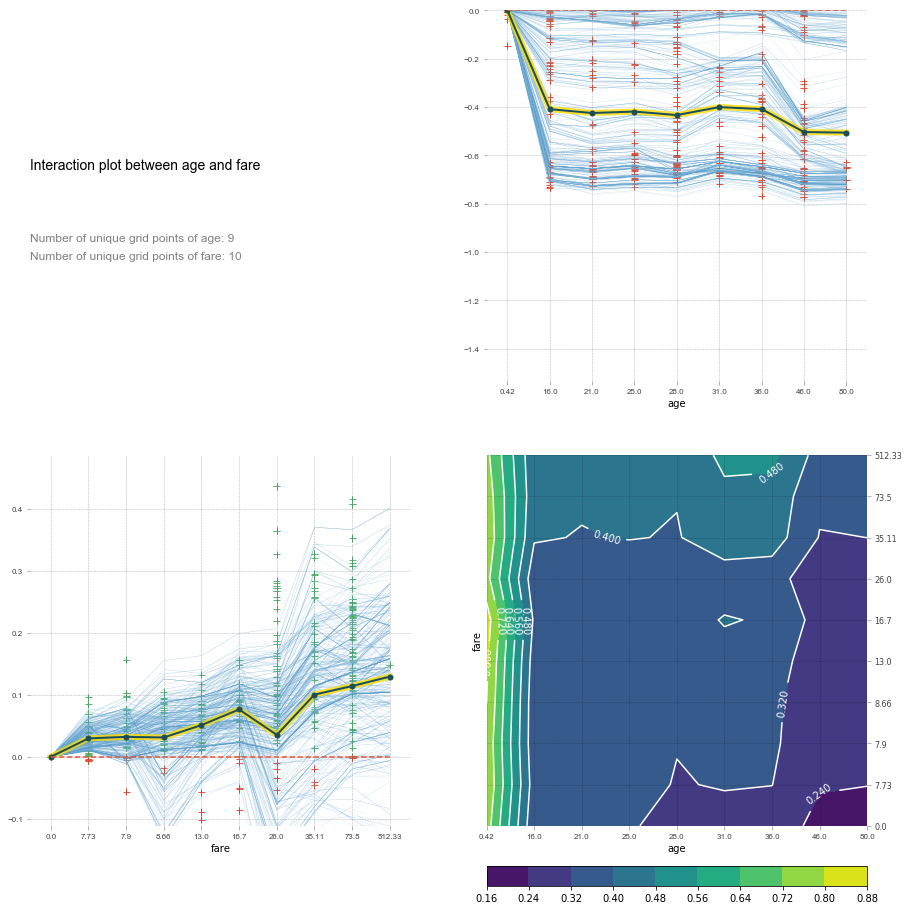

In [17]:
pdp_test.pdp_interact_plot(inter1, ['age', 'fare'], center=True, plot_org_pts=True, 
                           plot_lines=True, frac_to_plot=0.5, x_quantile=True)

#### compare with the original one

In [16]:
%time inter1_old = pdp.pdp_interact(clf, titanic[features], ['Age', 'Fare'])

CPU times: user 1.15 s, sys: 18.3 ms, total: 1.17 s
Wall time: 1.17 s


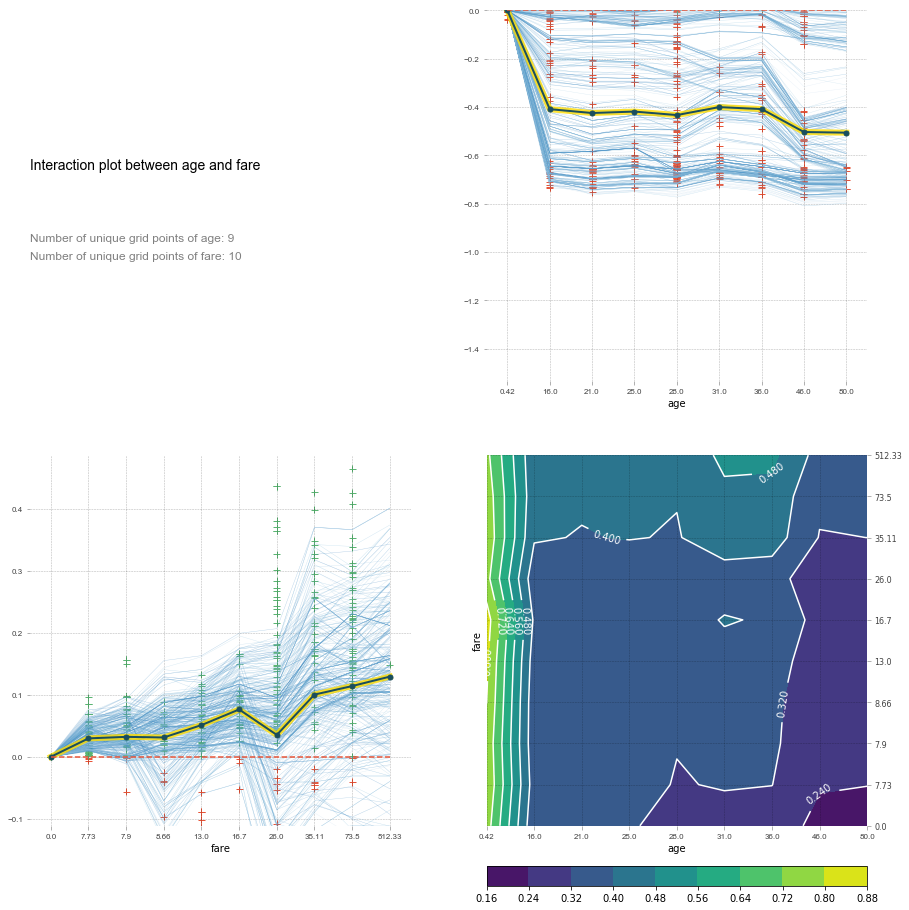

In [18]:
pdp.pdp_interact_plot(inter1, ['age', 'fare'], center=True, plot_org_pts=True, 
                      plot_lines=True, frac_to_plot=0.5, x_quantile=True)